In [1]:
# Install commands if your environment is missing nltk or wordcloud#!pip install nltk
#!pip install wordcloud

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00


In [2]:
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import word_tokenize
import numpy as np
import time
import gensim
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [3]:
isBOW = True 
vectorizer = CountVectorizer(stop_words='english')
vecModel = None

def BOW(reviews):
    return vectorizer.fit_transform(reviews)

def word2Vec(reviews):
    global isBOW
    global vecModel

    isBOW = False
    sentenceList = []
    for i in reviews:
        li = list(i.split(" "))
        sentenceList.append(li)
    vecModel = gensim.models.Word2Vec(sentenceList, min_count=1, workers=3, vector_size=100, window=3, sg=1)
    return np.array([get_average_vector(vecModel, review) for review in reviews])

def get_average_vector(model, sentence):
    words = sentence.split(" ")
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [4]:
startTime = time.time()

data = pd.read_csv('IMDB Dataset.csv')

reviewList = data['review']
sentiments = data['sentiment']

print('Number of Reviews: ', len(reviewList))
print('% Positive: ', (len(reviewList[sentiments == 'positive'])/len(reviewList))*100)
print('% Negative: ', (len(reviewList[sentiments == 'negative'])/len(reviewList))*100)

#Removing Punctuation
reviewList = reviewList.str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))

x = word2Vec(reviewList) #Change to BOW or word2Vec

#Predictive Model Split
x_train, x_test, y_train, y_test = train_test_split(x, sentiments, test_size=0.2, random_state=1)

Number of Reviews:  50000
% Positive:  50.0
% Negative:  50.0


In [5]:
positive_df = data[data['sentiment'] == 'positive']
negative_df = data[data['sentiment'] == 'negative']

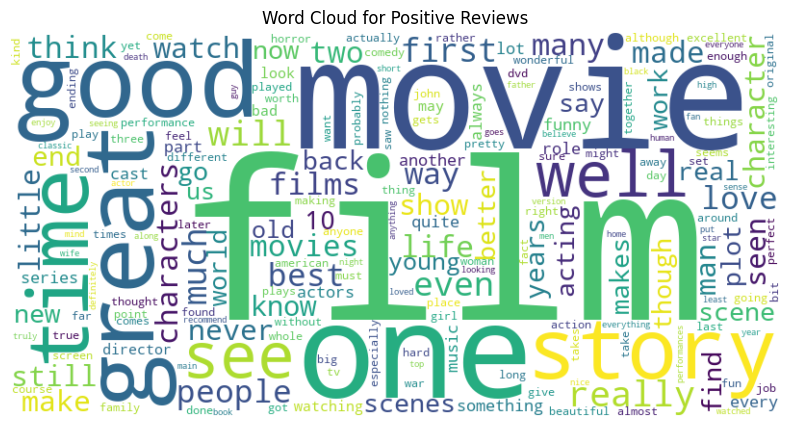

In [6]:
all_positive_reviews = " ".join(positive_df['review'].astype(str).tolist())

positive_words = re.findall(r"\b[\w']+\b", all_positive_reviews.lower())
positive_words = [word for word in positive_words if word not in STOPWORDS and word not in ["br"]]
positive_word_counts = Counter(positive_words)

wordcloud = WordCloud(
    width=800, height=400, background_color='white'
).generate_from_frequencies(positive_word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

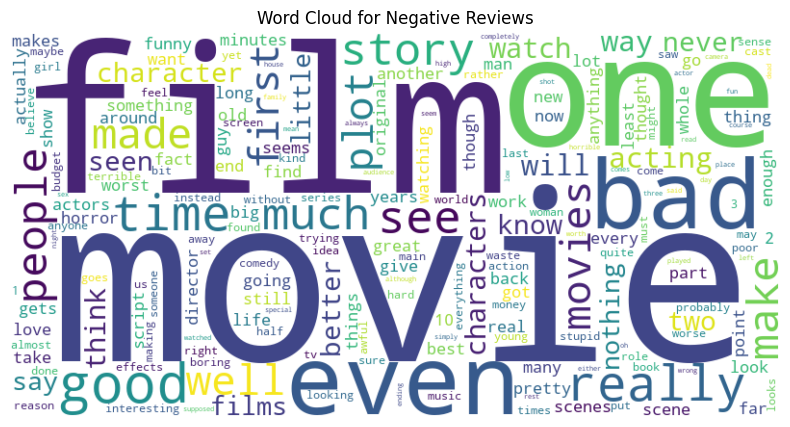

In [7]:
all_negative_reviews = " ".join(negative_df['review'].astype(str).tolist())

negative_words = re.findall(r"\b[\w']+\b", all_negative_reviews.lower())
negative_words = [word for word in negative_words if word not in STOPWORDS and word not in ["br"]]
negative_word_counts = Counter(negative_words)

wordcloud = WordCloud(
    width=800, height=400, background_color='white'
).generate_from_frequencies(negative_word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [8]:
positive_words = re.findall(r"\b[\w']+\b", all_positive_reviews.lower())

positive_words = [word for word in positive_words if word not in STOPWORDS and word not in ["br"]]

positive_word_counts = Counter(positive_words)
positive_word_freq_df = pd.DataFrame(positive_word_counts.items(), columns=['Word', 'Positive_Frequency'])
positive_word_freq_df = positive_word_freq_df.sort_values(by='Positive_Frequency', ascending=False).reset_index(drop=True)

print(positive_word_freq_df.head(20))

      Word  Positive_Frequency
0     film               41028
1    movie               37492
2      one               27028
3     good               15024
4    great               12963
5    story               12870
6     time               12744
7     well               12728
8      see               12263
9   really               10739
10    will               10268
11    even                9617
12   first                9230
13    much                9201
14    love                8683
15  people                8553
16    best                8508
17    life                8059
18     way                7864
19    many                7626


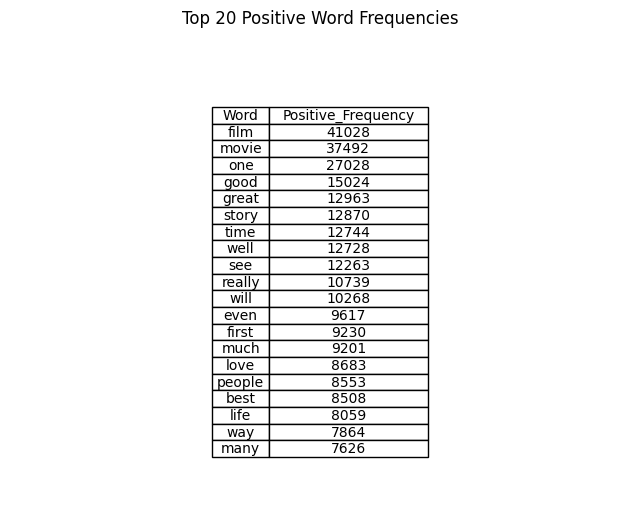

In [9]:
top_n = 20
top_words = positive_word_freq_df.head(top_n)

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
ax.axis('tight')

table = ax.table(
    cellText=top_words.values,
    colLabels=top_words.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(top_words.columns))))

for key, cell in table.get_celld().items():
    cell.set_text_props(va='center', ha='center')

ax.set_title("Top 20 Positive Word Frequencies", fontsize=12, pad=20)
plt.savefig("transparent_table.png", transparent=True, bbox_inches='tight')

plt.show()

In [10]:
negative_words = re.findall(r"\b[\w']+\b", all_negative_reviews.lower())
negative_words = [word for word in negative_words if word not in STOPWORDS and word not in ["br"]]

negative_word_counts = Counter(negative_words)
negative_word_freq_df = pd.DataFrame(negative_word_counts.items(), columns=['Word', 'Negative_Frequency'])
negative_word_freq_df = negative_word_freq_df.sort_values(by='Negative_Frequency', ascending=False).reset_index(drop=True)

print(negative_word_freq_df.head(20))

      Word  Negative_Frequency
0    movie               49668
1     film               36727
2      one               26060
3     even               15254
4      bad               14726
5     good               14721
6   really               12354
7     time               12350
8      see               10744
9    story               10143
10    much               10117
11    make                9352
12  people                9314
13    made                8801
14    well                8538
15   first                8353
16  movies                8313
17    plot                8197
18  acting                8077
19    will                7828


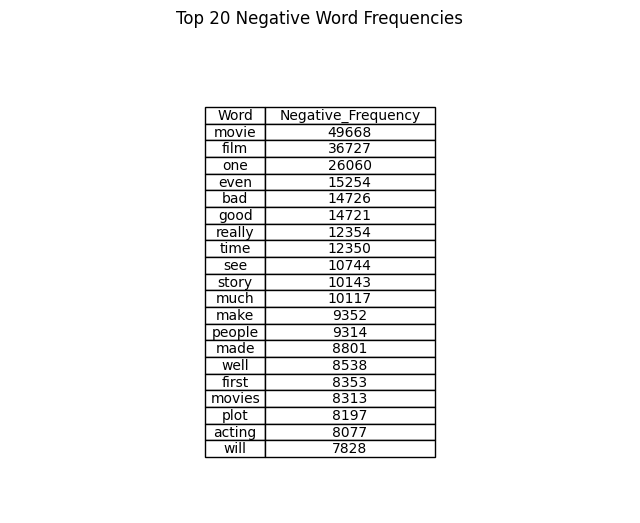

In [11]:
top_n = 20
top_words = negative_word_freq_df.head(top_n)

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
ax.axis('tight')

table = ax.table(
    cellText=top_words.values,
    colLabels=top_words.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(top_words.columns))))

for key, cell in table.get_celld().items():
    cell.set_text_props(va='center', ha='center')

ax.set_title("Top 20 Negative Word Frequencies", fontsize=12, pad=20)
plt.savefig("transparent_table.png", transparent=True, bbox_inches='tight')

plt.show()

In [12]:
freq_df = pd.merge(positive_word_freq_df, negative_word_freq_df, on='Word', how='outer').fillna(0)
freq_df['Frequency_Difference'] = freq_df['Positive_Frequency'] - freq_df['Negative_Frequency']

freq_df = freq_df.sort_values(by='Frequency_Difference', ascending=False).reset_index(drop=True)

print(freq_df.head(20))

           Word  Positive_Frequency  Negative_Frequency  Frequency_Difference
0         great             12963.0              5180.0                7783.0
1          best              8508.0              4101.0                4407.0
2          love              8683.0              4294.0                4389.0
3          film             41028.0             36727.0                4301.0
4          well             12728.0              8538.0                4190.0
5          life              8059.0              4747.0                3312.0
6         story             12870.0             10143.0                2727.0
7     excellent              3359.0               745.0                2614.0
8          will             10268.0              7828.0                2440.0
9     wonderful              2666.0               551.0                2115.0
10        years              5378.0              3380.0                1998.0
11        still              6425.0              4434.0         

In [13]:
positive_diff_df = freq_df[freq_df['Frequency_Difference'] > 0]

negative_diff_df = freq_df[freq_df['Frequency_Difference'] < 0]
negative_diff_df['Frequency_Difference'] = negative_diff_df['Frequency_Difference'].abs()
negative_diff_df = negative_diff_df.sort_values(by='Frequency_Difference', ascending=False).reset_index(drop=True)

print("Positive Frequency Differences:")
print(positive_diff_df.head(10))

print("\nNegative Frequency Differences:")
print(negative_diff_df.head(10))


Positive Frequency Differences:
        Word  Positive_Frequency  Negative_Frequency  Frequency_Difference
0      great             12963.0              5180.0                7783.0
1       best              8508.0              4101.0                4407.0
2       love              8683.0              4294.0                4389.0
3       film             41028.0             36727.0                4301.0
4       well             12728.0              8538.0                4190.0
5       life              8059.0              4747.0                3312.0
6      story             12870.0             10143.0                2727.0
7  excellent              3359.0               745.0                2614.0
8       will             10268.0              7828.0                2440.0
9  wonderful              2666.0               551.0                2115.0

Negative Frequency Differences:
      Word  Positive_Frequency  Negative_Frequency  Frequency_Difference
0    movie             37492.0       

C:\Users\cvcla\AppData\Local\Temp\ipykernel_14772\2632090416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_diff_df['Frequency_Difference'] = negative_diff_df['Frequency_Difference'].abs()


In [14]:
def create_wordcloud(data, title):
    word_freq = dict(zip(data['Word'], data['Frequency_Difference']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

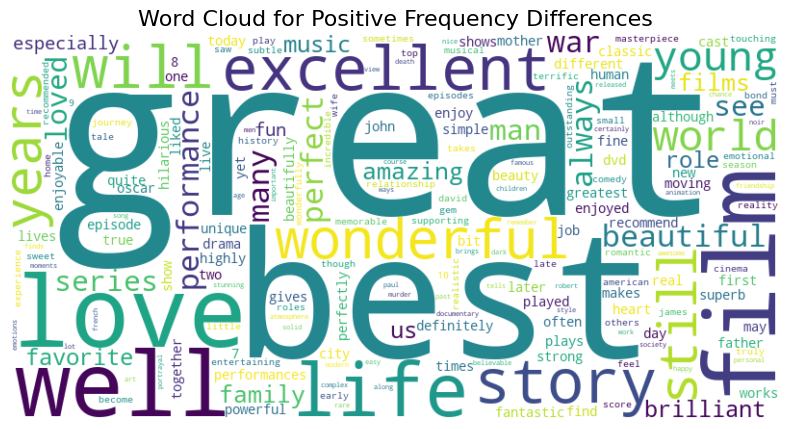

In [15]:
positive_diff_words = positive_diff_df[['Word', 'Frequency_Difference']]
create_wordcloud(positive_diff_words, 'Word Cloud for Positive Frequency Differences')

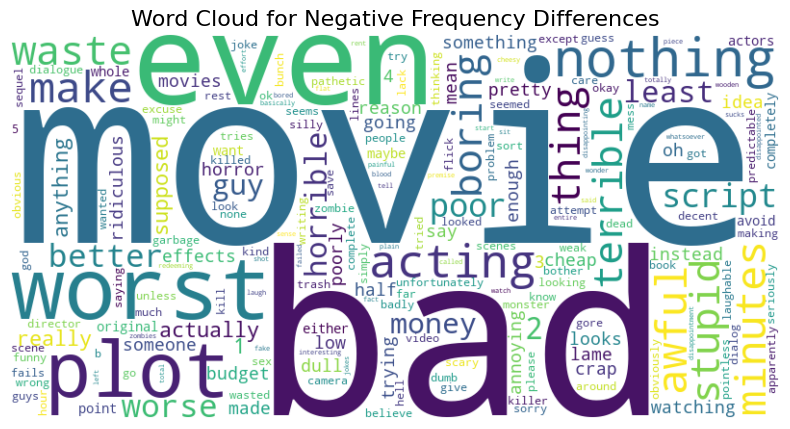

In [16]:
negative_diff_words = negative_diff_df[['Word', 'Frequency_Difference']]
create_wordcloud(negative_diff_words, 'Word Cloud for Negative Frequency Differences')

In [17]:
from sklearn import tree

def DT(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time() 
        clf = tree.DecisionTreeClassifier(max_depth=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start

        print(f"Max Depth {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Decision Tree: Accuracy vs. Max Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best Decision Tree Depth: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [18]:
def KNN(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = KNeighborsClassifier(n_neighbors=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"KNN N = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('K-Nearest Neighbor: Accuracy vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best K Value: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [19]:
def LR(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = LogisticRegression(C=param, max_iter=500)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"LR C = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Logistic Regression : Accuracy vs. C Value')
    plt.xlabel('C Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best C Value: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [20]:
def RF(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = RandomForestClassifier(n_estimators=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"Number of Trees = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Randmon Forest : Accuracy vs. Number of Trees')
    plt.xlabel('Number of Trees')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best Number of Trees: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best


Max Depth 1 Completed in 2 Seconds with Accuracy of 66.22%
Max Depth 5 Completed in 9 Seconds with Accuracy of 72.32%
Max Depth 10 Completed in 15 Seconds with Accuracy of 72.97%
Max Depth 50 Completed in 61 Seconds with Accuracy of 69.76%
Max Depth 100 Completed in 22 Seconds with Accuracy of 70.02%


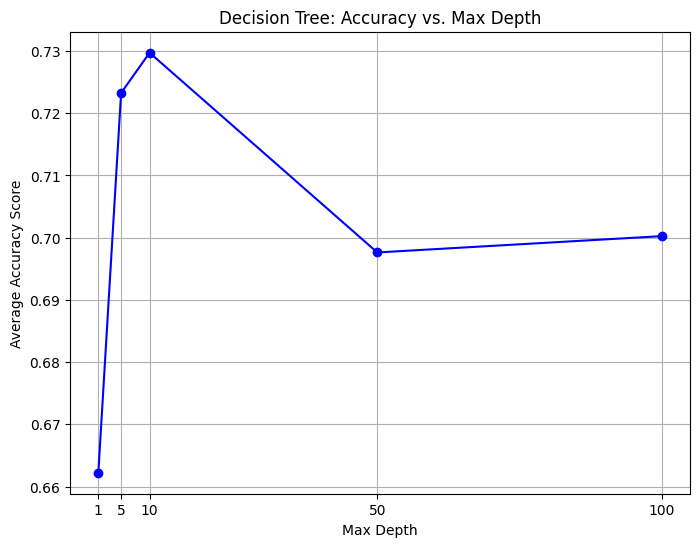

Best Decision Tree Depth:  10
Accuracy: 72.97 %


In [21]:
DT_DEPTHS = [1, 5, 10, 50, 100]
bestD = DT(x_train, y_train, DT_DEPTHS)

KNN N = 1 Completed in 2 Seconds with Accuracy of 73.77%
KNN N = 5 Completed in 2 Seconds with Accuracy of 78.34%
KNN N = 10 Completed in 2 Seconds with Accuracy of 78.86%
KNN N = 50 Completed in 3 Seconds with Accuracy of 80.33%
KNN N = 100 Completed in 3 Seconds with Accuracy of 79.97%
KNN N = 150 Completed in 4 Seconds with Accuracy of 79.60%


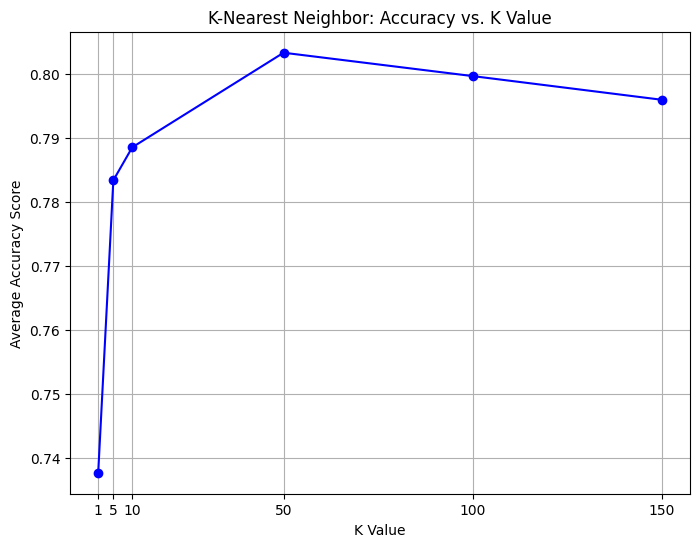

Best K Value:  50
Accuracy: 80.33 %


In [22]:
kVals = [1, 5, 10, 50, 100, 150]
bestK = KNN(x_train, y_train, kVals)

LR C = 0.001 Completed in 0 Seconds with Accuracy of 70.62%
LR C = 0.01 Completed in 1 Seconds with Accuracy of 77.56%
LR C = 0.1 Completed in 1 Seconds with Accuracy of 84.00%
LR C = 0.5 Completed in 1 Seconds with Accuracy of 85.32%
LR C = 1 Completed in 1 Seconds with Accuracy of 85.51%


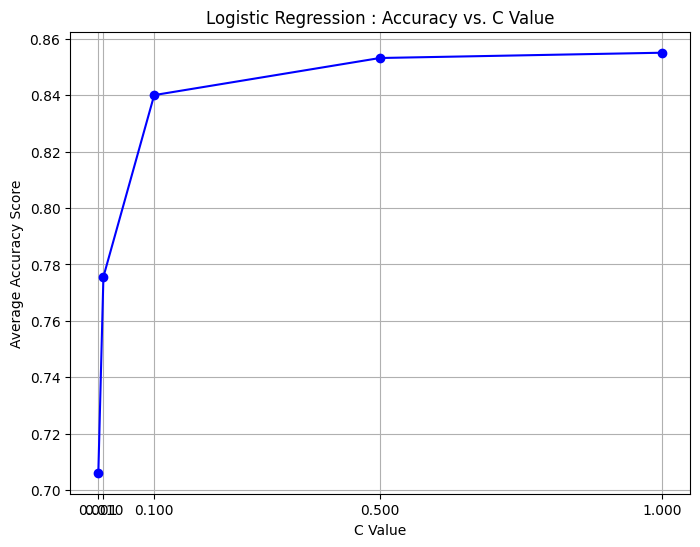

Best C Value:  1
Accuracy: 85.51 %


In [23]:
cVals = [0.001, 0.01, 0.1, 0.5, 1]
bestC = LR(x_train, y_train, cVals)

Number of Trees = 5 Completed in 8 Seconds with Accuracy of 74.33%
Number of Trees = 10 Completed in 15 Seconds with Accuracy of 77.02%
Number of Trees = 50 Completed in 119 Seconds with Accuracy of 81.13%
Number of Trees = 100 Completed in 140 Seconds with Accuracy of 81.99%
Number of Trees = 150 Completed in 204 Seconds with Accuracy of 82.27%


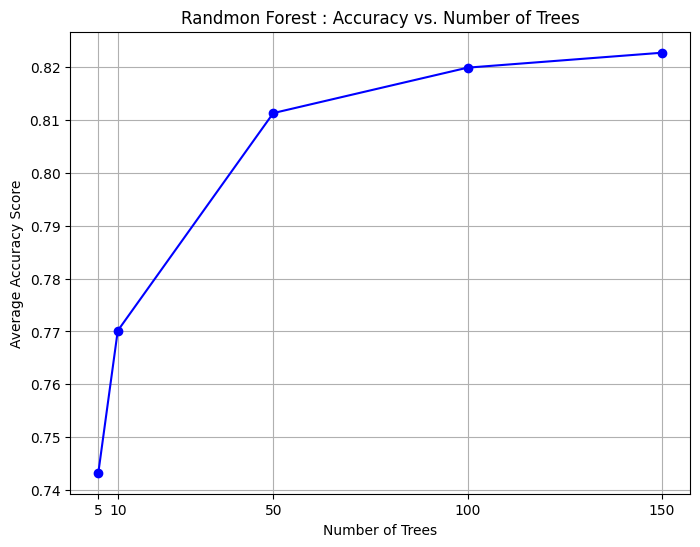

Best Number of Trees:  150
Accuracy: 82.27 %


In [24]:
trees = [5, 10, 50, 100, 150]
bestTrees = RF(x_train, y_train, trees)

In [25]:
start = time.time()
DT = tree.DecisionTreeClassifier(max_depth=bestD)
DT.fit(x_train, y_train)
print(f"Time to Train DT {(time.time() - start):.0f} Seconds")

start = time.time()
KNN = KNeighborsClassifier(n_neighbors=bestK)
KNN.fit(x_train, y_train)
print(f"Time to Train KNN {(time.time() - start):.0f} Seconds")

start = time.time()              
LR = LogisticRegression(C=bestC, max_iter=500)
LR.fit(x_train, y_train)
print(f"Time to Train LR {(time.time() - start):.0f} Seconds")

start = time.time()              
RF = RandomForestClassifier(n_estimators=bestTrees)
RF.fit(x_train, y_train)
print(f"Time to Train RF {(time.time() - start):.0f} Seconds")

elapsed = time.time() - startTime
print(f"{elapsed:.0f} Seconds to Evaluate Hyperparameters and train models")

Time to Train DT 4 Seconds
Time to Train KNN 0 Seconds
Time to Train LR 0 Seconds
Time to Train RF 63 Seconds
816 Seconds to Evaluate Hyperparameters and train models


In [26]:
if isBOW:
    feature_names = vectorizer.get_feature_names_out()
    class_names = DT.classes_

    plt.figure(figsize=(40, 20))
    plot_tree(DT, filled=True, feature_names=feature_names, class_names=class_names, max_depth=3)
    plt.show()

In [27]:
if isBOW:
    importances = DT.feature_importances_

    words = vectorizer.get_feature_names_out()
    importantWords = pd.DataFrame({
        'word': words,
        'importance': importances
    })

    mostImportant = importantWords.sort_values(by='importance', ascending=False)
    print("Most Important Words\n")
    print(mostImportant.head(15))

Decision Tree Accuracy: 73.06%
K Nearest Neighbor Accuracy: 80.34%
Logistic Regression Accuracy: 86.20%
Random Forest Accuracy: 82.56%

Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.73      0.73      5044
    positive       0.73      0.73      0.73      4956

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

K Nearest Neighbor Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.86      0.82      5044
    positive       0.84      0.75      0.79      4956

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0

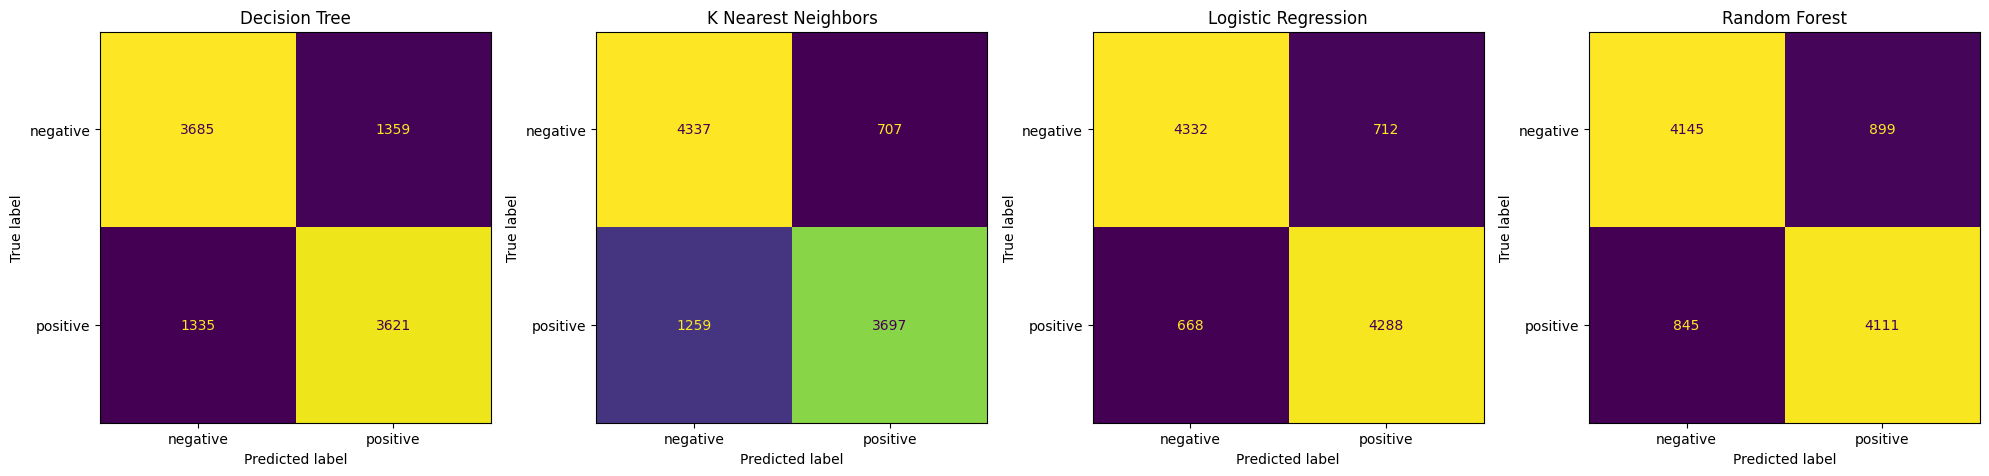

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using models
predictDT = DT.predict(x_test)
predictKNN = KNN.predict(x_test)
predictLR = LR.predict(x_test)
predictRF = RF.predict(x_test)

# Accuracy scores
DTAcc = accuracy_score(y_test, predictDT)
KNNAcc = accuracy_score(y_test, predictKNN)
LRAcc = accuracy_score(y_test, predictLR)
RFAcc = accuracy_score(y_test, predictRF)

#Accuracies
print(f"Decision Tree Accuracy: {DTAcc*100:.2f}%")
print(f"K Nearest Neighbor Accuracy: {KNNAcc*100:.2f}%")
print(f"Logistic Regression Accuracy: {LRAcc*100:.2f}%")
print(f"Random Forest Accuracy: {RFAcc*100:.2f}%\n")

# Classification Reports
print("Decision Tree Classification Report:\n", classification_report(y_test, predictDT))
print("K Nearest Neighbor Classification Report:\n", classification_report(y_test, predictKNN))
print("Logistic Regression Classification Report:\n", classification_report(y_test, predictLR))
print("Random Forest Classification Report:\n", classification_report(y_test, predictRF))

# Confusion Matrices
confDT = confusion_matrix(y_test, predictDT)
confKNN = confusion_matrix(y_test, predictKNN)
confLR = confusion_matrix(y_test, predictLR)
confRF = confusion_matrix(y_test, predictRF)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

ConfusionMatrixDisplay(confusion_matrix=confDT, display_labels=DT.classes_).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Decision Tree")

ConfusionMatrixDisplay(confusion_matrix=confKNN, display_labels=KNN.classes_).plot(ax=axes[1], colorbar=False)
axes[1].set_title("K Nearest Neighbors")

ConfusionMatrixDisplay(confusion_matrix=confLR, display_labels=LR.classes_).plot(ax=axes[2], colorbar=False)
axes[2].set_title("Logistic Regression")

ConfusionMatrixDisplay(confusion_matrix=confRF, display_labels=RF.classes_).plot(ax=axes[3], colorbar=False)
axes[3].set_title("Random Forest")

plt.tight_layout()
plt.show()


In [29]:
import random

# Determine Best Model Based on Accuracy
models = [[DT, DTAcc],[KNN, KNNAcc],[LR, LRAcc],[RF, RFAcc]]
bestModel, bestAccuracy = max(models, key=lambda x: x[1])

seeds = [random.randint(1, 100) for _ in range(5)]
accuracies = []

print('Best Model:', bestModel)
print('Tesing 5 random Seeds:')
for seed in seeds:
    bestModel.set_params(random_state=seed, max_iter=500)
    bestModel.fit(x_train, y_train)
    
    predictions = bestModel.predict(x_test)

    accuracy = accuracy_score(y_test, predictions)
    accuracies.append((accuracy))

    print(f"Seed: {seed} Accuracy: {accuracy*100:.2f}%")

mean = np.mean(accuracies)
stdDeviation = np.std(accuracies)

print(f"\nMean Accuracy: {mean:.2f}%")
print(f"Standard Deviation: {stdDeviation:.2f}")


Best Model: LogisticRegression(C=1, max_iter=500)
Tesing 5 random Seeds:
Seed: 85 Accuracy: 86.20%
Seed: 31 Accuracy: 86.20%
Seed: 60 Accuracy: 86.20%
Seed: 75 Accuracy: 86.20%
Seed: 21 Accuracy: 86.20%

Mean Accuracy: 0.86%
Standard Deviation: 0.00


Test Reviews

In [30]:
newReview = "This movie is good"

cleaned = newReview.lower().strip().translate(str.maketrans('', '', string.punctuation))

if isBOW:
    vectorized = vectorizer.transform([cleaned])
else:
    vectorized = np.array([get_average_vector(vecModel, cleaned)])

predictionDT = DT.predict(vectorized)
predictionKNN = KNN.predict(vectorized) 
predictionLR = LR.predict(vectorized)
predictionRF = RF.predict(vectorized)

print('Decision Tree:       Predicted Sentiment for: "' + newReview + '" is ' + predictionDT[0].upper())
print('K-Nearest Neighbor:  Predicted Sentiment for: "' + newReview + '" is ' + predictionKNN[0].upper())
print('Logistic Regression: Predicted Sentiment for: "' + newReview + '" is ' + predictionLR[0].upper())
print('Random Forest:       Predicted Sentiment for: "' + newReview + '" is ' + predictionRF[0].upper())

Decision Tree:       Predicted Sentiment for: "This movie is good" is POSITIVE
K-Nearest Neighbor:  Predicted Sentiment for: "This movie is good" is NEGATIVE
Logistic Regression: Predicted Sentiment for: "This movie is good" is POSITIVE
Random Forest:       Predicted Sentiment for: "This movie is good" is POSITIVE
